In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#런타임 다시시작

In [ ]:
from google.colab import files
uploaded= files.upload()
filename= list(uploaded.keys())[0]
filename

In [3]:
import pandas as pd
raw_df = pd.read_excel('./12346.xlsx')
raw_df.head(1)

,품목일련번호,제품명,업체명,주성분,이 약의 효능은 무엇입니까?,이 약은 어떻게 사용합니까?,이 약을 사용하기 전에 반드시 알아야 할 내용은 무엇입니가?,이 약의 사용상 주의사항은 무엇입니까?,이 약을 사용하는 동안 주의해야 할 약 또는 음식은 무엇입니까?,이 약은 어떤 이상반응이 나타날 수 있습니까?,이 약은 어떻게 보관해야 합니까?,공개일자,수정일자
0,200300406,닥터베아제정,(주)대웅제약,"디아스타제·프로테아제·셀룰라제,판셀라제,크리아제-PEG,디아스타제·프로테아제100,...","이 약은 소화불량, 식욕감퇴(식욕부진), 과식, 체함, 소화촉진, 소화불량으로 인한...",성인 1회 1정을 1일 3회 식후에 복용합니다.,NaN,만 7세 이하의 소아는 이 약을 복용하지 마십시오.이 약을 복용하기 전에 알레르기 ...,NaN,NaN,습기와 빛을 피해 실온에서 보관하십시오.어린이의 손이 닿지 않는 곳에 보관하십시오.,2020-12-24,2021-01-29


In [ ]:
import pandas as pd
raw_df = pd.read_excel(filename)
raw_df.head(1)

In [5]:
import numpy as np
import re
 

In [6]:
byongs = []
for byong in raw_df['이 약의 효능은 무엇입니까?']:
    byong = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '', byong).strip().split(" ")
    byongs.append(byong)
 

In [7]:
raw_df['byongs'] = byongs

In [8]:
raw_df.tail(1)

,품목일련번호,제품명,업체명,주성분,이 약의 효능은 무엇입니까?,이 약은 어떻게 사용합니까?,이 약을 사용하기 전에 반드시 알아야 할 내용은 무엇입니가?,이 약의 사용상 주의사항은 무엇입니까?,이 약을 사용하는 동안 주의해야 할 약 또는 음식은 무엇입니까?,이 약은 어떤 이상반응이 나타날 수 있습니까?,이 약은 어떻게 보관해야 합니까?,공개일자,수정일자,byongs
4468,201605724,히트펜정,(주)라이트팜텍,"에페드린염산염,카페인무수물,아세트아미노펜","이 약은 감기의 여러 증상(기침, 가래, 인후(목구멍)통, 오한(춥고 떨리는 증상)...","성인은 1회 1회정씩, 1일 3회 식후 30분에 복용합니다.",매일 세잔 이상 정기적 음주자가 이 약 또는 다른 해열진통제를 복용할 때는 의사 또...,"이 약에 과민증 환자, 다른 해열진통제, 감기약 복용 시 천식을 일으킨 적이 있는 ...","아세트아미노펜을 포함하는 다른 제품, MAO 억제제(항우울제, 항정신병제, 감정조절...","발진·발적(충혈되어 붉어짐), 가려움, 구역·구토, 식욕부진, 변비, 부종(부기),...",습기와 빛을 피해 실온에서 보관하십시오.어린이의 손이 닿지 않는 곳에 보관하십시오.,2021-01-29,2021-01-29,"[이, 약은, 감기의, 여러, 증상기침, 가래, 인후목구멍통, 오한춥고, 떨리는, ..."


In [9]:
from collections import Counter 

In [10]:
b_total = []
for b in raw_df.byongs:
    b_total.extend(b)



In [11]:
stopwords = ['이','약은','완화','체력','6', '사용합니다', '증상의', '여러', '후',
             '저하', '후의', '인한', '및', '등', '의', '' '', '이의','예방', '보급의', '눈의',
             '또는','회복','의한', '1', '2', '앓는', '임신수유기', '보급에',
             '아연의', '뼈', '떨리는',
             '증상','수반하는','눈의','완화에', '시', '보급과', '동안이나','노년기의']

b_total = [b for b in b_total if b not in stopwords]
 

In [12]:
b_counts = Counter(b_total)

In [13]:
b_counts.most_common(50)

[('근육통', 786),
 ('비타민', 627),
 ('신경통', 543),
 ('두통', 542),
 ('육체피로', 529),
 ('관절통', 521),
 ('발열', 456),
 ('습진', 450),
 ('병중병후병을', 418),
 ('어깨결림', 353),
 ('코막힘', 351),
 ('피부염', 338),
 ('재채기', 335),
 ('근육통의', 324),
 ('관절염', 322),
 ('감기의', 315),
 ('통증', 288),
 ('기침', 287),
 ('발육기', 284),
 ('각기', 278),
 ('구내염입안염', 265),
 ('구순염입술염', 256),
 ('설염혀염', 252),
 ('발육불량', 248),
 ('구각염입꼬리염', 248),
 ('속쓰림', 246),
 ('증상콧물', 246),
 ('가래', 246),
 ('구루병의', 245),
 ('류마티양', 242),
 ('알레르기성', 242),
 ('관절통요통', 217),
 ('구토', 213),
 ('치통', 211),
 ('오한춥고', 209),
 ('위산과다', 205),
 ('피로', 198),
 ('만성', 193),
 ('치료에', 190),
 ('염증', 186),
 ('동통통증', 178),
 ('위통', 175),
 ('체함', 174),
 ('어깨목결림', 173),
 ('가려움', 172),
 ('인후목구멍통', 165),
 ('수술', 165),
 ('말초혈행장애', 162),
 ('수술후', 158),
 ('구역', 154)]

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

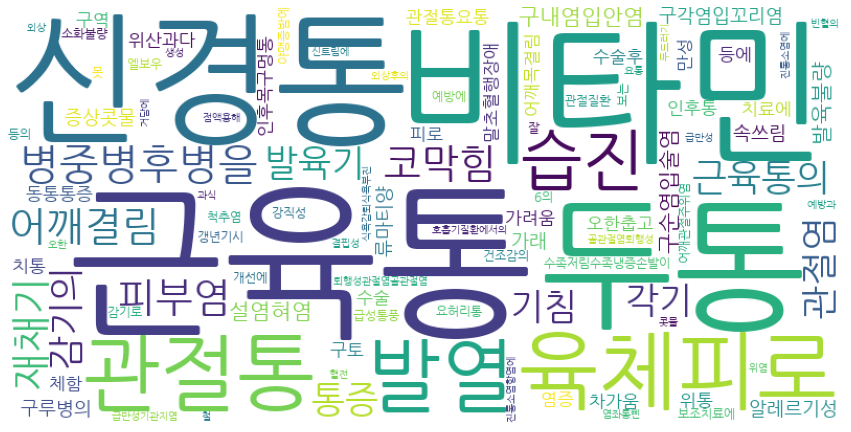

In [15]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(b_counts)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
df = pd.DataFrame([b_counts])

In [ ]:
df.head()

,소화불량,식욕감퇴식욕부진,과식,체함,소화촉진,소화불량으로,위부팽만감에,급성,상기도,감염으로,발열,해열에,급만성기관지염,기관지천식,후두염,부비동염,낭성섬유증의,질환에서객담배출곤란에,감기로,통증에,어깨결림,요통,신경통,류마티스,타박상,염좌삠,근육통,관절통의,진통,소염항염에,위십이지장궤양,위염,위산과다,속쓰림,구역,구토,위통,신트림의,제산작용,개선에,...,소화기관내의,생성가스의,흡착과약물,화학약품에,중독시,흡착제로,응급해독에,사용합니다그러나,약용탄은,시안화물을,흡착하지,않으며,지방성,탄화수소,리튬염,부식성,염화나트륨,중금속,즉,납,시안화납,붕산,무기산과,석유증류물의,흡착은,상대적으로,효과적이지,못합니다,설사의,보조적,치료요법으로,약은먼지,공기,장기간의,컴퓨터사용에,이물감,피로감콘택트렌즈,착용에,증상에서눈의,습윤에
0,124,102,110,174,87,82,59,51,33,28,456,69,109,85,78,73,66,66,128,41,353,98,543,24,89,13,786,28,69,39,88,93,205,246,154,213,175,66,89,133,...,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [1]:
df = df.transpose()

NameError: ignored

In [ ]:
df.to_csv('./df_des.csv')